<a href="https://colab.research.google.com/github/rifahma/image-quality-enhancer-RGB/blob/main/Generate_Image_Quality_RGB.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Set Custom Resolution for Image Upscalling

In [ ]:
# import the required libraries
import tensorflow as tf
import tensorflow_hub as hub
import cv2
import requests
import numpy as np
import matplotlib.pyplot as plt

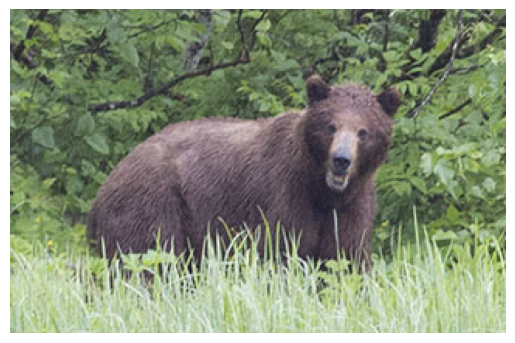

In [ ]:
# Loading the image
img = cv2.imread('/content/badbear.jpg')

# Check if the image was loaded correctly
if img is None:
  raise FileNotFoundError("Image not found")

# Convert BGR (OpenCV's default) to RGB for plotting
image_plot = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)  # Convert BGR to RGB
plt.imshow(image_plot)
plt.axis('off') # hide axis for a cleaner look
plt.show()

Note here:  
cv2 is a library from OpenCV to read and load the image file. We need to pair it with .imread  

cvtColor is used to loads image in BGR format by defaul. While matplotlib expect images in RGB format ONLY.

Okay then, it's me when I was 10 or 11. I guess...

In [ ]:
# define the preprocessing function using the SR model

def preprocessing(img):
  # instead of using a global variable like "image_plot.shape"
  imageSize = (tf.convert_to_tensor(img.shape[:-1]) // 4) * 4
  cropped_image = tf.image.crop_to_bounding_box(img, 0, 0, imageSize[0], imageSize[1])
  preprocessed_image = tf.cast(cropped_image, tf.float32)
  return tf.expand_dims(preprocessed_image, 0)

In [ ]:
# Load the ESRGAN (enhanced super resolution generative adversial network) model from hub
esrgn_path = "https://tfhub.dev/captain-pool/esrgan-tf2/1"
model = hub.load(esrgn_path)

In [ ]:
# define the super resolution model function
def srmodel(img):
    preprocessed_image = preprocessing(img)  # Preprocess the LR image
    new_image = model(preprocessed_image)   # Run the model
    return tf.squeeze(new_image) / 255.0  # Normalize the output image

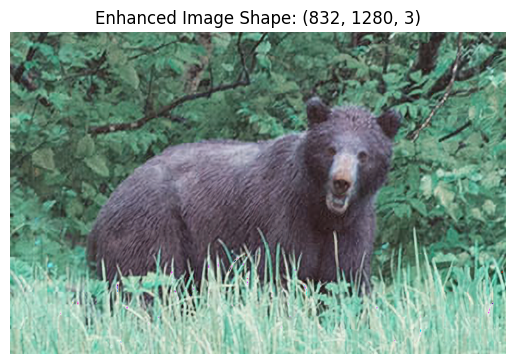

In [ ]:
# Convert the output tensor to a NumPy array and ensure correct color format

hr_image = srmodel(image_plot)
hr_image_np = np.array(hr_image * 255, dtype=np.uint8)  # Scale pixel values
hr_image_np = cv2.cvtColor(hr_image_np, cv2.COLOR_RGB2BGR)  # Convert back to BGR

plt.title(f"Enhanced Image Shape: {hr_image_np.shape}")
plt.imshow(hr_image_np)  # Display the corrected image
plt.axis('off')
plt.show()

In [ ]:
# want to check!
print("Original image sample pixels:", img_sample[0, 0]) # before or original
print("Preprocessed image sample pixels:", image_plot[0, 0]) # after conversion
print("High resolution output sample pixells:", hr_image_np[0, 0]) # final output

Original image sample pixels: [216 222 217]
Preprocessed image sample pixels: [217 222 216]
High resolution output sample pixells: [169 146 134]
